<a href="https://colab.research.google.com/github/mirellalimeira/Projetos---An-lise-Explorat-ria-de-Dados/blob/main/Mirella_Limeira_Proj_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resumo:


## Utilizei os dados do Brasil.IO sobre o número de mortes registrados em cartório civil desde 1970 no Brasil.
(https://www.kaggle.com/amandalk/registered-deaths-brazil)

## Devido aos dados serem diretamente voltados ao nº de óbitos, minhas análises foram voltadas a como esse nº de mortes varia por cada estado e região, além de sua mudança ao longo dos anos.

## - Total de óbitos registrados por estado.
## - Total de óbitos registrados por região.
## - Total de óbitos registrado por ano.
## - Total de óbitos registrados por mês.
## - Os 5 estados com o maior registro de óbitos para todo o período.
## - Os 5 estados com o maior registro de óbitos para todo o período + Alagoas.
## - Número de óbitos de 5 estados de cada região durante todo o período (sem critério de escolha):
## - Número de óbitos registrados em 2019 com a estimativa populacional daquele ano.
## - Comparando o total de óbitos registrados pelo Rio de Janeiro com os outros estados:

#.

# Hipóteses:

## 1 - As regiões Nordeste e Suldeste terão o maior número de registro de óbitos (de 1970 até 2020). = = Já que são as regiões mais populosas do Brasil.

## 2 - São Paulo será o estado com o maior número de registro de óbitos (de 1970 até 2020). = Já que é o estado mais populoso do Brasil.

## 3 - Roraima será o estado com o menor número de registro de óbitos (de 1970 até 2020). = Já que é o estado menos populoso do Brasil.

## 4 - Os meses com o maior número de registro de óbitos será os meses mais recentes de 2020, devido ao alto número de óbitos pelo COVID-19.

## 5 - Os anos com o maior número de registro de óbitos serão os anos mais recentes os 5 anos mais recentes. 

## 6 - Os 5 estados como maior número de registro de óbitos serão São Paulo, Minas Gerais, Rio de Janeiro, Bahia e Paraná.

## 7 - O número de registro de óbitos será proporcional a estimativa populacional de cada estado em 2019.



# Conclusão: 

## 1 - As regiões Sudeste e Sul são as que mais registraram número de registro de óbitos, mesmo Sul sendo a terceira mais populosa. (refutado)

## 2 - São Paulo foi o estado que mais número de registro de óbitos. (corroborado)

## 3 - Roraima foi o estado com o menor número de registro de óbitos. (corroborado)

## 4 - Os meses mais recentes de 2020 ocupam 4 lugares na lista, seguido por julho de 2019. Entretanto, pela tabela não conter todos os meses de 2020, esse último lugar na ocupado por 07/2019 provavelmente, com a tabela de 2020 completa, será ocupado por algum mês de 2020. (refutado)

## 5 - Os anos com maior número de registro de óbitos foram os 5 mais recentes. 2020 mesmo não completo, ainda ocupa os 5 anos que mais registraram óbitos. (corroborado)

## 6 - Os estados com o maior número de registro de óbitos foram São Paulo, Minas Gerais, Paraná, Pernambuco e Rio Grande do Sul, respectivamente. (refutado)

## 7 - As estimativas populacionais e o número de registro de óbitos para o ano de 2019 não são proporcionais. (refutado)

## Em todo o período, Minas Gerais tem o número de registro de óbitos 4x maior que o número de registro de óbitos do Rio de Janeiro, apesar de que no ano de 2019 o número de registro de óbitos do RJ tenha sido maior que o de MG.

## Análise dos dados:

Inicie aqui o desenvolvimento do seu projeto, não esqueça de adicionar textos curtos e objetivos para que os avaliadores entendam sua linha de raciocínio e as conclusões que você está chegando crie uma narrativa convincente e coerênte aos dados analisados.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import matplotlib.ticker as ticker
from matplotlib import style

In [ ]:
dados = pd.read_csv("/content/deaths_brazil.csv", 
                   sep=",", engine='python', thousands=".")
dados.head()

,year,month,state,deaths
0,1970,1,AM,1
1,1970,1,BA,6
2,1970,1,CE,9
3,1970,1,DF,52
4,1970,1,ES,65


In [ ]:
dados.tail(2)

,year,month,state,deaths
15028,2020,8,SE,1452
15029,2020,8,TO,741


## Criando uma coluna com o formato datetime juntando as colunas 'year' e ' month:


In [ ]:
dados['date'] = pd.to_datetime(dados[['year', 'month']].assign(DAY=1))
dados.tail()

,year,month,state,deaths,date
15025,2020,8,RR,86,2020-08-01
15026,2020,8,SC,4666,2020-08-01
15027,2020,8,SP,31782,2020-08-01
15028,2020,8,SE,1452,2020-08-01
15029,2020,8,TO,741,2020-08-01


In [ ]:
dados['deaths'].sum()

27473168

# Para adicionar uma coluna contendo as regiões, com a finalidade de analisar os registros em um ambito mais amplo, usei o método .map() e criei um dict para relacionar os estados e suas regiões

In [ ]:
dx = {'AM': 'Norte', 'AC': 'Norte', 'TO': 'Norte', 'AP': 'Norte', 'RO': 'Norte', 'PA': 'Norte', 
      'RR': 'Norte', 'BA' : 'Nordeste', 'CE' : 'Nordeste', 'MA' : 'Nordeste',
     'PB' : 'Nordeste', 'PE' : 'Nordeste', 'PI' : 'Nordeste', 'SE' : 'Nordeste',
     'AL' : 'Nordeste', 'RN' : 'Nordeste', 'GO' : 'Centro-Oeste', 'MT' : 'Centro-Oeste',
     'MS' : 'Centro-Oeste', 'DF' : 'Centro-Oeste', 'PR' : 'Sul',
     'SC' : 'Sul', 'RS' : 'Sul', 'RJ' : 'Sudeste', 'ES'  : 'Sudeste',
     'MG' : 'Sudeste', 'SP' : 'Sudeste'}

In [ ]:
dados['region'] = dados['state'].map(dx)
dados.head()

,year,month,state,deaths,date,region
0,1970,1,AM,1,1970-01-01,Norte
1,1970,1,BA,6,1970-01-01,Nordeste
2,1970,1,CE,9,1970-01-01,Nordeste
3,1970,1,DF,52,1970-01-01,Centro-Oeste
4,1970,1,ES,65,1970-01-01,Sudeste


# .

# .

# .

# Análises:

# .

# Total de óbitos registrados por estado durante todo o período:

#### Usei o .groupby() para criar um dataframe mais específico.

In [ ]:
total_mortes_UF = dados.groupby(['state'], as_index=False).sum()
total_mortes_UF = total_mortes_UF.drop(['year', 'month'], axis=1)
total_mortes_UF = total_mortes_UF.sort_values("deaths", ascending=False)
total_mortes_UF.head()

,state,deaths
25,SP,11462960
10,MG,4197092
17,PR,2628992
15,PE,2437118
22,RS,973288


In [ ]:
total_mortes_UF.tail()

,state,deaths
2,AM,54108
26,TO,52034
3,AP,48826
0,AC,48394
21,RR,23043


Text(0.5, 1.0, 'Total de óbitos registrados em cartório de 1970 até 2020 por UF')

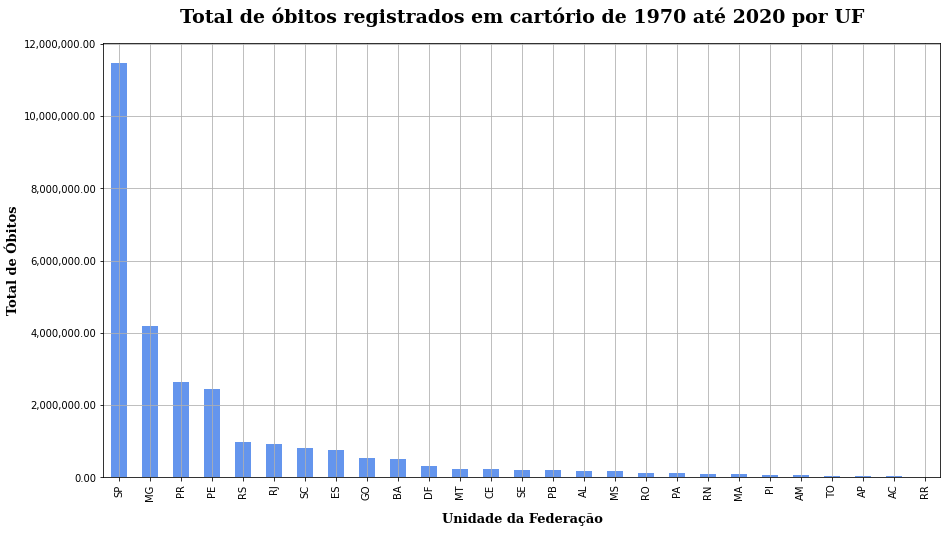

In [ ]:
ax = total_mortes_UF.plot( x="state", grid=True, kind='bar', figsize=(15,8),legend=None, color='cornflowerblue',)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

ax.set_ylabel('Total de Óbitos', fontsize=13, fontname='serif', fontweight = 'bold')
ax.set_xlabel('Unidade da Federação', labelpad=12,fontsize=13, fontname='serif', fontweight = 'bold', )

plt.title("Total de óbitos registrados em cartório de 1970 até 2020 por UF", fontsize=19, fontname='serif', pad=20, fontweight = 'bold')


# .

# .

# Total de óbitos registrados por região durante todo o período:

#### Também usei o .groupby() para criar um dataframe mais específico.

In [ ]:
total_mortes_reg = dados.groupby(['region']).sum()
total_mortes_reg = total_mortes_reg.drop(['year', 'month'], axis=1)
total_mortes_reg

,deaths
region,
Centro-Oeste,1250685
Nordeste,4014683
Norte,478061
Sudeste,17324989
Sul,4404750


Text(0.5, 1.0, 'Total de óbitos registrados em cartório de 1970 até 2020 por região')

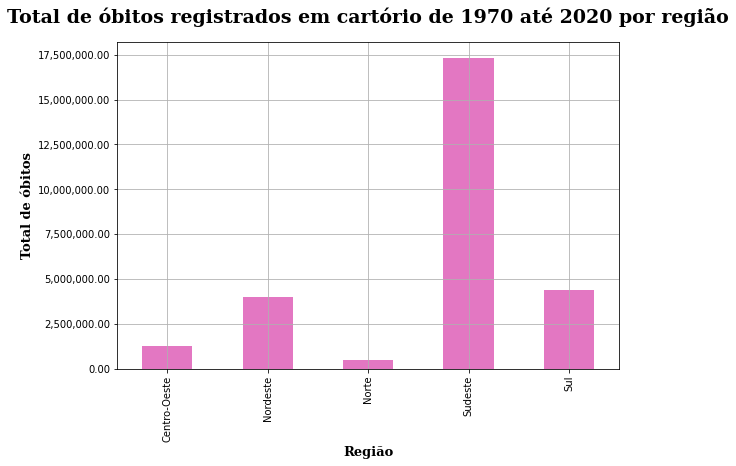

In [ ]:
ax = total_mortes_reg.plot(grid=True,kind='bar', figsize=(9,6), color='tab:pink', legend=None)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

ax.set_ylabel('Total de óbitos', fontsize=13, fontname='serif', fontweight = 'bold')
ax.set_xlabel('Região', fontsize=13, fontname='serif', fontweight = 'bold')

plt.title("Total de óbitos registrados em cartório de 1970 até 2020 por região", pad=20,fontsize=19, fontname='serif', fontweight = 'bold')

# .


# .

# Analisando o nº de óbitos registrados por ano:

### Ordenei pelo nº de óbitos para facilitar a visualiação na tabela e no gráfico

### O ano de 2020, por não se ter uma base completa com todos os meses, não estaria em primeiro lugar por esse motivo

In [ ]:
total_mortes_ano = dados.groupby([dados['date'].dt.year]).sum()
total_mortes_ano = total_mortes_ano.drop(['month', 'year'], axis=1)
total_mortes_ano = total_mortes_ano.sort_values("deaths", ascending=False)
head = total_mortes_ano.head()
head

,deaths
date,
2019,1246612
2018,1181229
2017,1031169
2016,993676
2020,945114


In [ ]:
tail = total_mortes_ano.tail(5)
tail

,deaths
date,
1973,316849
1974,316573
1972,288090
1971,281565
1970,272214


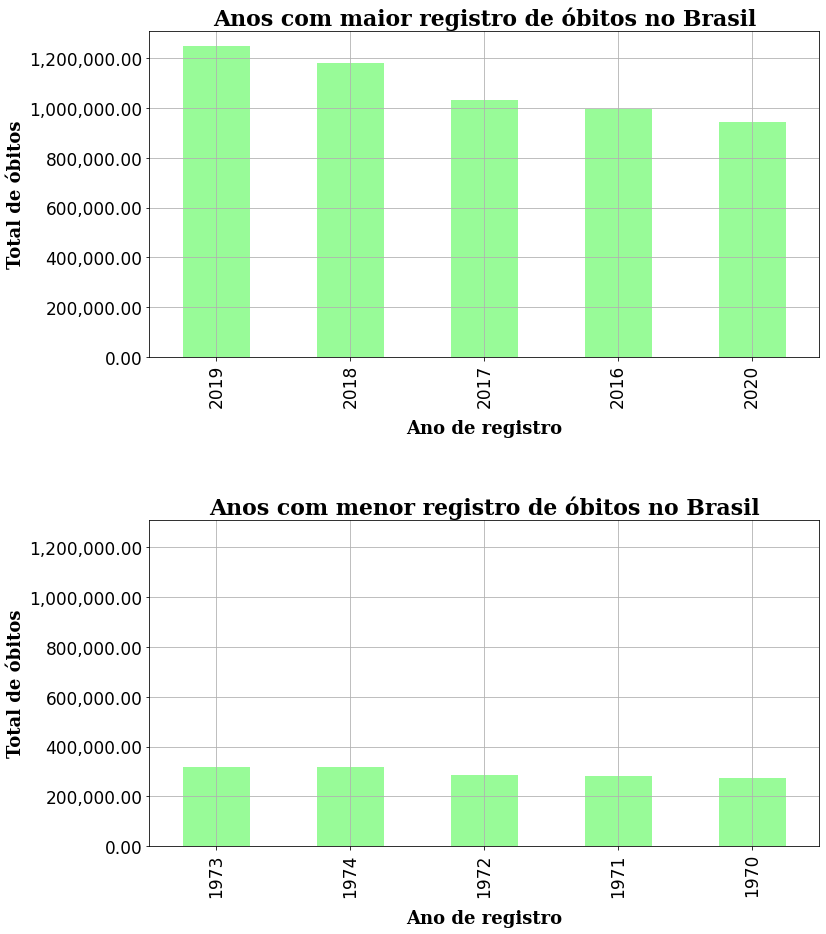

In [ ]:
fig, axes = plt.subplots(2, figsize=(12, 15), sharey=True)
fig.subplots_adjust(wspace=0.3, hspace=0.5)

ax = head.plot( ax=axes[0],legend=None, color='palegreen', kind='bar', fontsize=(17), linewidth=3, grid=True)
axes[0].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
axes[0].set_title('Anos com maior registro de óbitos no Brasil', fontsize=22, fontname='serif', fontweight = 'bold')
axes[0].set_ylabel('Total de óbitos', fontsize=18, fontname='serif', fontweight = 'bold')
axes[0].set_xlabel('Ano de registro',labelpad=12, fontsize=18, fontname='serif', fontweight = 'bold')
axes[0].legend(loc='upper center', bbox_to_anchor=(0.5,-0.05), ncol=5, fontsize=15)
ax.legend_ = None
ax = tail.plot( ax=axes[1],legend=False, kind= 'bar', color='palegreen', fontsize=(17),  grid=True, linewidth=3)
axes[1].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
axes[1].set_title('Anos com menor registro de óbitos no Brasil', fontsize=22, fontname='serif', fontweight = 'bold')
axes[1].set_ylabel('Total de óbitos', fontsize=18, fontname='serif', fontweight = 'bold')
axes[1].set_xlabel('Ano de registro',labelpad=12, fontsize=18, fontname='serif', fontweight = 'bold')
axes[1].legend(loc='upper center', bbox_to_anchor=(0.5,-0.05), ncol=5, fontsize=15)
ax.legend_ = None

# .

# .

# Analisando o nº de óbitos registrados por mês:

### Apesar dos dados de 2020 não estarem completos, o mês com maior registro de óbitos foi no mês de julho de 2020, maior que todos os outros meses de todos os anos até 1970.

### Esse fato provavelmente tem relação direta com o nº de fatalidades pela COVID-19.

In [ ]:
grupo_data_mês = dados.groupby([dados['date'].dt.date]).sum()
grupo_data_mês = grupo_data_mês.drop(['month', 'year'], axis=1)
grupo_data_mês = grupo_data_mês.sort_values("deaths", ascending=False)
grupo_data_mês.head()

,deaths
date,
2020-07-01,136728
2020-06-01,132361
2020-05-01,130470
2020-08-01,126535
2019-07-01,120077


# .

# .

# Os 5 estados com o maior registro de óbitos para todo o período:

In [ ]:
total_mortes_UF_5 = total_mortes_UF.sort_values("deaths", ascending=False)
total_mortes_UF_5 = total_mortes_UF_5.head(5)
total_mortes_UF_5 

,state,deaths
25,SP,11462960
10,MG,4197092
17,PR,2628992
15,PE,2437118
22,RS,973288


Text(0.5, 1.0, 'Estados que mais registraram óbitos de 1970 até 2020')

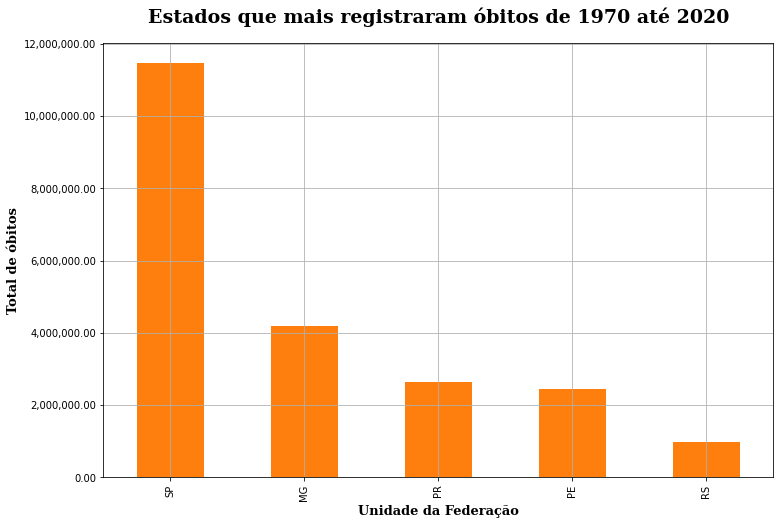

In [ ]:
ax = total_mortes_UF_5.plot(x ='state', grid=True, legend = None, kind='bar', figsize=(12,8), color='tab:orange')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

ax.set_ylabel('Total de óbitos', fontsize=13, fontname='serif', fontweight = 'bold')
ax.set_xlabel('Unidade da Federação', fontsize=13, fontname='serif', fontweight = 'bold')

plt.title("Estados que mais registraram óbitos de 1970 até 2020",pad=20, fontsize=19, fontname='serif', fontweight = 'bold')

#.

#.

# Os 5 estados com o maior registro de óbitos para todo o período + Alagoas:

In [ ]:
AL = total_mortes_UF[total_mortes_UF['state']=='AL']
total_mortes_UF_5_AL = total_mortes_UF_5.append(AL)
total_mortes_UF_5_AL

,state,deaths
25,SP,11462960
10,MG,4197092
17,PR,2628992
15,PE,2437118
22,RS,973288
1,AL,190035


Text(0.5, 1.0, 'Comparação entre as UFs que mais registraram mortes e Alagoas de 1970 até 2020')

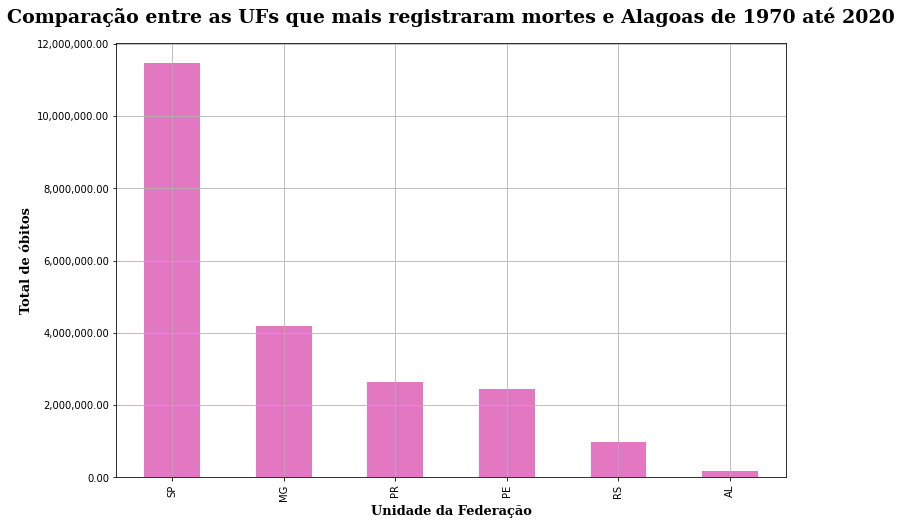

In [ ]:
ax = total_mortes_UF_5_AL.plot(x = 'state',grid=True, legend = None,kind='bar', figsize=(12,8), color='tab:pink')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

ax.set_ylabel('Total de óbitos', fontsize=13, fontname='serif', fontweight = 'bold')
ax.set_xlabel('Unidade da Federação', fontsize=13, fontname='serif', fontweight = 'bold')

plt.title("Comparação entre as UFs que mais registraram mortes e Alagoas de 1970 até 2020", pad = 20,fontsize=19, fontname='serif', fontweight = 'bold')

#.

#.

# Comparando número de óbitos de 5 estados de cada região durante todo o período (sem critério de escolha):

In [ ]:
total_mortes_UF_escolha = total_mortes_UF[total_mortes_UF['state'].isin(['AC','PE', 'RJ', 'SC', 'MT' ])]
total_mortes_UF_escolha 

,state,deaths
15,PE,2437118
18,RJ,912779
23,SC,802470
12,MT,234675
0,AC,48394


Text(0.5, 1.0, 'Comparando o registro de óbitos de UFs desde 1970')

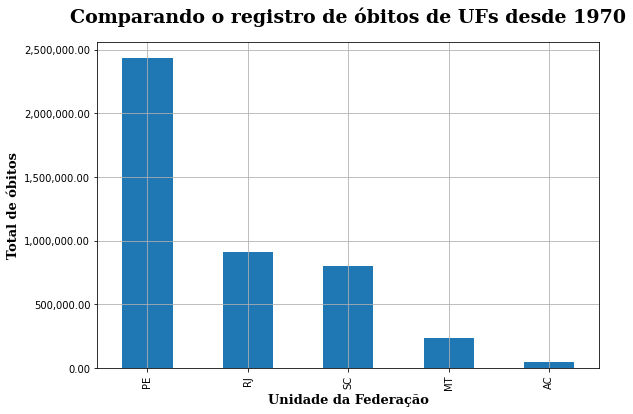

In [ ]:
ax = total_mortes_UF_escolha.plot(x='state', y='deaths',grid=True, legend = None, kind='bar', figsize=(9,6), color='tab:blue')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

ax.set_ylabel('Total de óbitos', fontsize=13, fontname='serif', fontweight = 'bold')
ax.set_xlabel('Unidade da Federação', fontsize=13, fontname='serif', fontweight = 'bold')

plt.title("Comparando o registro de óbitos de UFs desde 1970", fontsize=19, pad=20, fontname='serif', fontweight = 'bold')

# .

# .


# Comparando o nº de óbitos registrados em 2019 com a estimativa populacional daquele ano: 

## Dados do site do IBGE 
### Fonte: ftp://ftp.ibge.gov.br/Estimativas_de_Populacao/Estimativas_2019/estimativa_dou_2019.xls

In [ ]:
dados2 = pd.read_excel("/content/estimativa2019.xls", 
                   thousands=".", sheet_name = 'BRASIL E UFs', skipfooter = 7, skiprows=1)

dados2.drop(['Unnamed: 1'], axis=1, inplace=True)
dados2.head(1)

,BRASIL E UNIDADES DA FEDERAÇÃO,POPULAÇÃO ESTIMADA
0,Brasil,210147125


In [ ]:
dados2_estados = dados2.drop(dados2.index[[0,1,9,19,24,28]])
dados2_estados = dados2_estados.sort_values("POPULAÇÃO ESTIMADA", ascending=False)
dados2_estados.head()

,BRASIL E UNIDADES DA FEDERAÇÃO,POPULAÇÃO ESTIMADA
23,São Paulo,45919049
20,Minas Gerais,21168791
22,Rio de Janeiro,17264943
18,Bahia,14873064
25,Paraná,11433957


In [ ]:
grupo_ano_2019 = grupo_ano[grupo_ano['date'] == 2019]
grupo_ano_2019 = grupo_ano_2019.sort_values("deaths", ascending=False)
grupo_ano_2019 = grupo_ano_2019.drop(['date'], axis=1)
grupo_ano_2019.head()

,state,region,deaths
1271,SP,Sudeste,312164
947,RJ,Sudeste,146890
545,MG,Sudeste,126170
1118,RS,Sul,89990
240,BA,Nordeste,74103


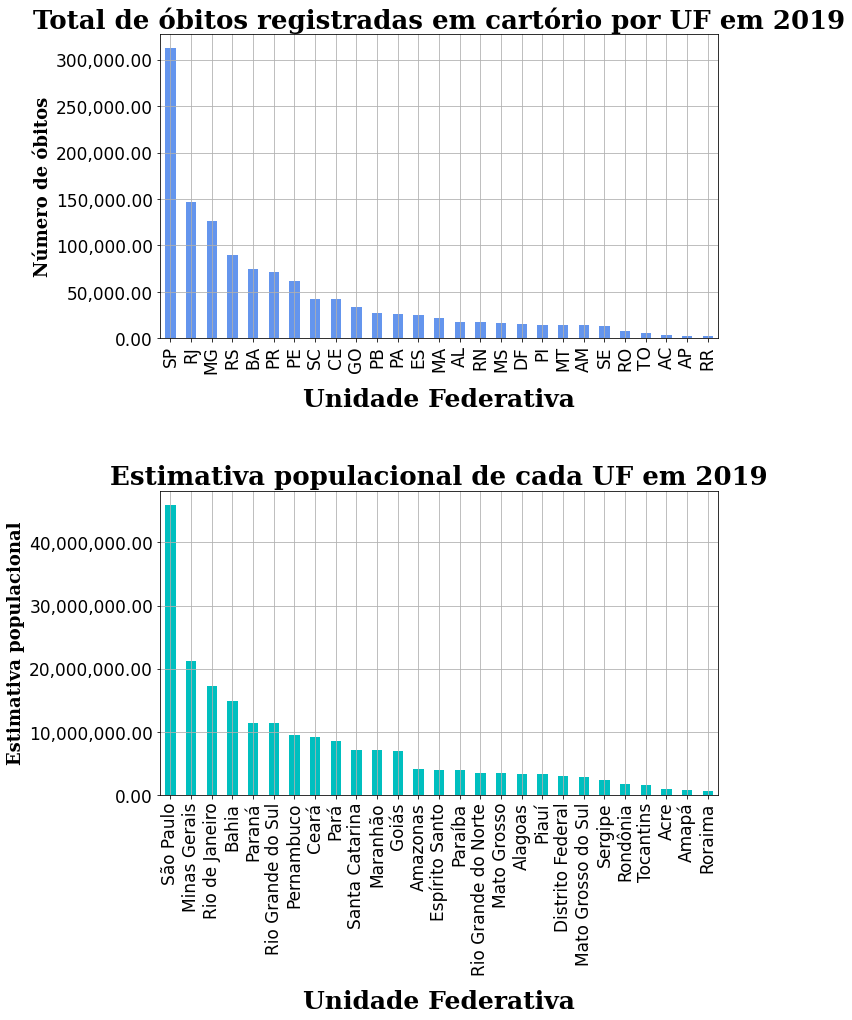

In [ ]:
fig, axes = plt.subplots(2, figsize=(10, 14))
fig.subplots_adjust(wspace=0.3, hspace=0.5)

ax = grupo_ano_2019.plot(x = 'state', y='deaths', ax=axes[0], color='cornflowerblue', kind='bar', fontsize=(17), linewidth=3, grid=True)
axes[0].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
axes[0].set_title('Total de óbitos registradas em cartório por UF em 2019', fontsize=26, fontname='serif', fontweight = 'bold')
axes[0].set_ylabel('Número de óbitos', fontsize=18, fontname='serif', fontweight = 'bold')
axes[0].set_xlabel('Unidade Federativa',labelpad=14, fontsize=25, fontname='serif', fontweight = 'bold')
ax.legend_ = None

ax = dados2_estados.plot(x = 'BRASIL E UNIDADES DA FEDERAÇÃO', y='POPULAÇÃO ESTIMADA', ax=axes[1], kind= 'bar', color='c', fontsize=(17),  grid=True, linewidth=3)
axes[1].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
axes[1].set_title('Estimativa populacional de cada UF em 2019', fontsize=26, fontname='serif', fontweight = 'bold')
axes[1].set_ylabel('Estimativa populacional', fontsize=18, fontname='serif', fontweight = 'bold')
axes[1].set_xlabel('Unidade Federativa',labelpad=14, fontsize=25, fontname='serif', fontweight = 'bold')
ax.legend_ = None

# . 

# .

# Comparando o total de óbitos registrados pelo Rio de Janeiro com os outros estados:

In [ ]:
total_mortes_UF_index = total_mortes_UF.set_index('state')

In [ ]:
mortes_comp_RJ = total_mortes_UF_index / total_mortes_UF_index.loc['RJ']
mortes_comp_RJ = mortes_comp_RJ.sort_values('deaths', ascending=False)
mortes_comp_RJ.head(7)

,deaths
state,
SP,12.558308
MG,4.598147
PR,2.880206
PE,2.669998
RS,1.066291
RJ,1.000000
SC,0.879150
